In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# print(sc.__version__)

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.4.0
asciitree           NA
asttokens           NA
cloudpickle         3.1.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dask                2024.11.2
dateutil            2.9.0
debugpy             1.8.2
decorator           5.1.1
executing           2.0.1
h5py                3.11.0
igraph              0.11.8
ipykernel           6.29.5
ipywidgets          8.1.5
jedi                0.19.1
jinja2              3.0.3
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
markupsafe          3.0.2
matplotlib          3.7.5
mpl_toolkits        NA
msgpack             1.1.0
natsort             8.4.0
numba               0.60.0
numcodecs           0.14.0
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
pickleshare    

/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


In [89]:
# alignment from preprocess
DATA_NAME="D07"
adata = sc.read_visium("/autofs/bal31/jhsu/home/projects/sc/data/work_batch_1/bam/%s_bam/outs" % (DATA_NAME))

reading /autofs/bal31/jhsu/home/projects/sc/data/work_batch_1/bam/D07_bam/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


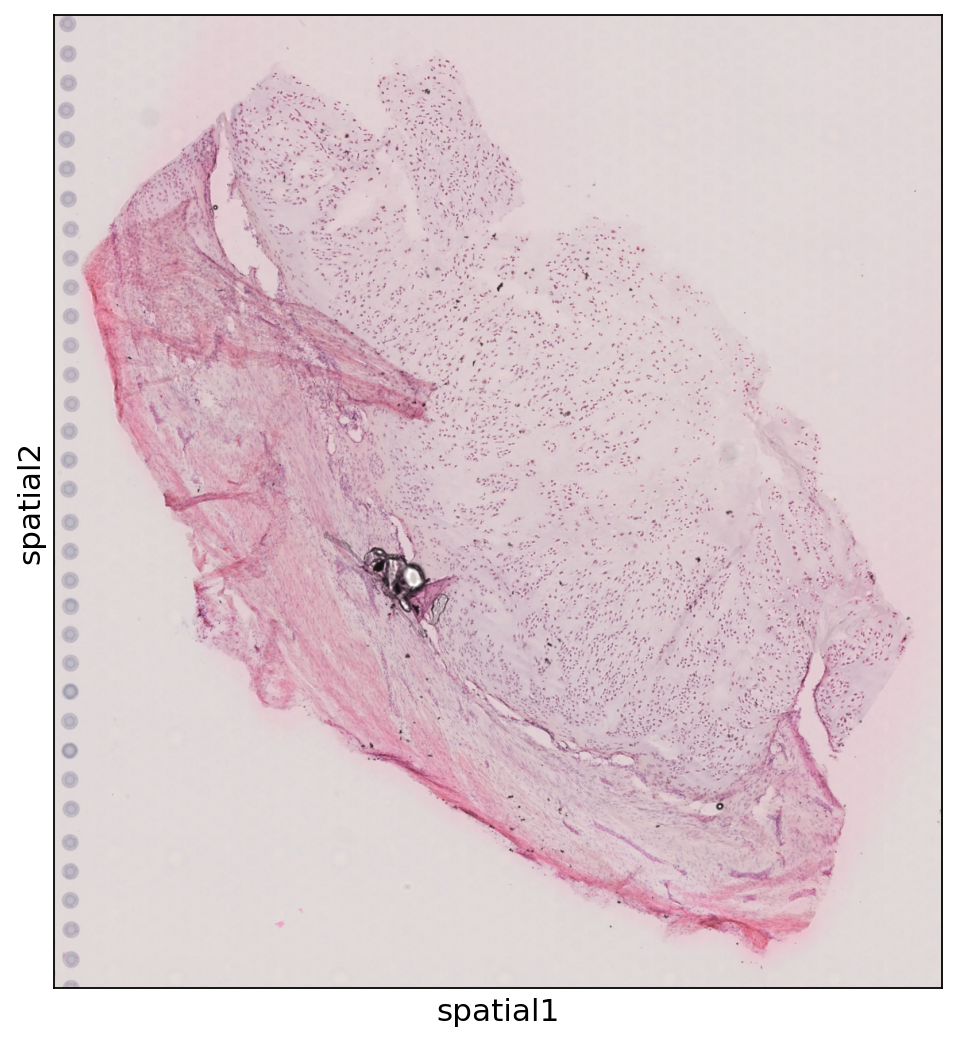

In [90]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(
    adata,
    img_key="hires",
    size=1
)

In [91]:
sc_p_df = pd.DataFrame(data={
    'ID': adata.obs["in_tissue"].index,
    'X': adata.obsm['spatial'][:, 0],
    'Y': adata.obsm['spatial'][:, 1],
})

In [92]:
# maester SNP and alone from MAESTER_*.ipynb
af_df = pd.read_csv("/autofs/bal31/jhsu/home/projects/sc/data/work_batch_1/mquad/%s/clone_af.csv" % (DATA_NAME), header=0)

af_df = af_df.rename(columns={"bracode": "ID"})
af_df = af_df.astype({"clone": str})
af_df.head()

ID clone   1872T>A   1868G>A   1865C>A   1861T>A   1866T>A  \
0  AAACAGAGCGACTCCT-1     9  0.036145  0.036145  0.024096  0.024096  0.036145   
1  AAACCGGGTAGGTACC-1    15  0.051706  0.041139  0.031992  0.030992  0.037344   
2  AAACCTCATGAAGTTG-1     5  0.025575  0.021025  0.010204  0.012658  0.014031   
3  AAACGAAGAACATACC-1     5  0.035320  0.026077  0.011062  0.016520  0.014349   
4  AAAGACCCAAGTCGCG-1     2  0.024390  0.000000  0.006061  0.000000  0.000000   

    1862T>A    843G>A    842C>A  ...   1760G>A  12136T>C    811G>A   1800G>A  \
0  0.024096  0.316667  0.316667  ...  0.000000  0.066667  0.015625  0.032609   
1  0.034126  0.046065  0.039326  ...  0.009819  0.024735  0.006369  0.020202   
2  0.013977  0.031325  0.021429  ...  0.008946  0.025381  0.004073  0.017523   
3  0.016556  0.028319  0.022530  ...  0.010970  0.037736  0.010836  0.020243   
4  0.006061  0.015385  0.015152  ...  0.009174  0.127660  0.000000  0.005405   

    1719G>C   1891A>C   8243G>A    762G>T  12138A>G    697G>T  
0  0.000000  0.000000  0.000000  0.042857  0.000000  0.000000  
1  0.007391  0.008495  0.035294  0.017391  0.005747  0.008310  
2  0.004912  0.001416  0.018868  0.020716  0.014493  0.014210  
3  0.003353  0.006173  0.041237  0.025751  0.005525  0.009498  
4  0.004464  0.000000  0.000000  0.010870  0.000000  0.000000  

[5 rows x 26 columns]

In [93]:
sc_df = pd.merge(sc_p_df, af_df, how='left')
adata.obs[sc_df.columns[3:]] = sc_df[sc_df.columns[3:]].values

adata.obs = adata.obs.astype({i: float for i in sc_df.columns[4:]})
clone_n = sc_df['clone'].nunique()
print(clone_n)

16


axes: Axes(0.18,0.15;0.78x0.76)


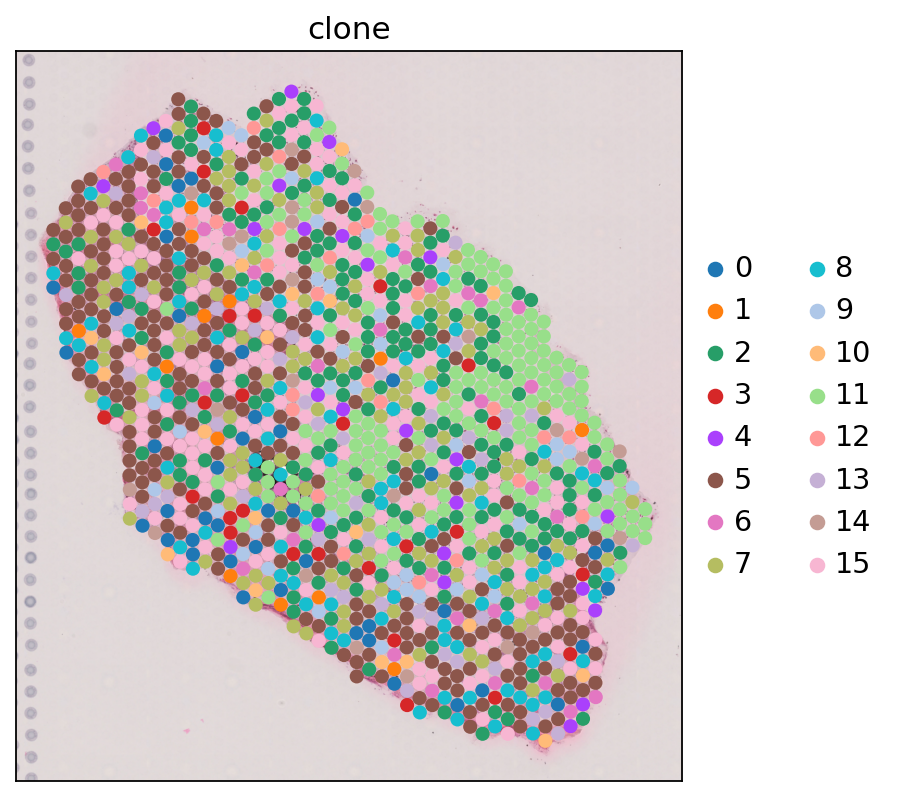

In [96]:
ncols = 1
nrows = 1
figsize = 6
wspace = 0.9
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols - 1), nrows * figsize),
)
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print("axes:", axs)

# tar_c = "clone_3"
tar_c = "clone"
sc.pl.spatial(adata, img_key="hires", color=[tar_c], ax=axs, show=False, size=1.5)

axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)

3 3


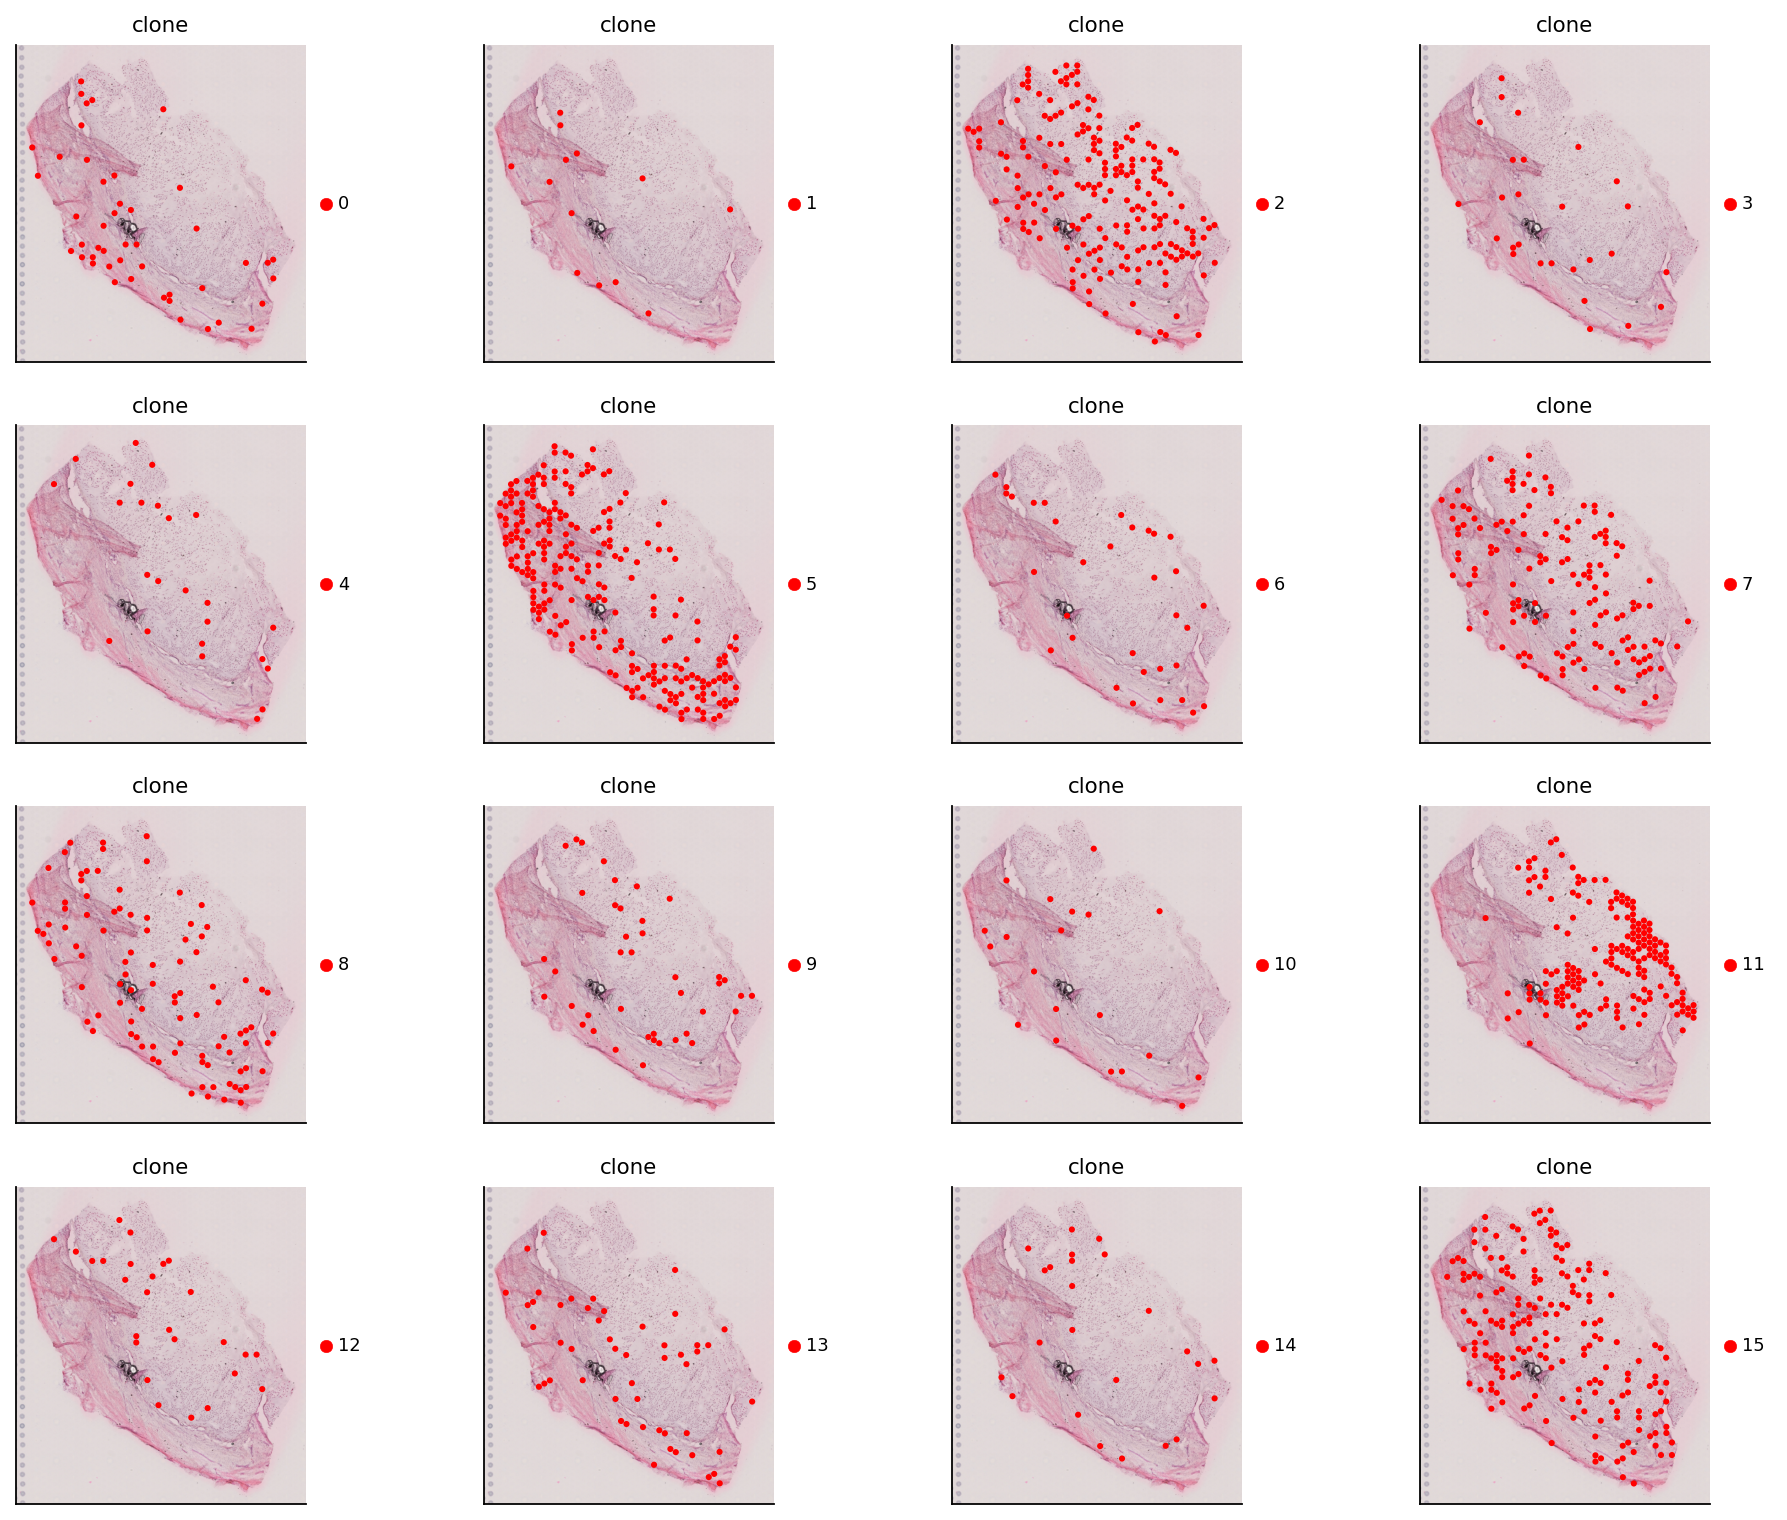

In [123]:
import math

tar_c = "clone"
clone_n = adata.obs['clone'].nunique()
ncols = 4

# ncols = 3
n_l = int(math.ceil(clone_n/ncols))

nrows = n_l
figsize = 3
wspace = 0.25
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols - 1), nrows * figsize),
)
# print(axs)
plt.subplots_adjust(wspace=wspace)

cm = dict()
for i in range(clone_n):
    tar_c = "%s" % (i)
    cm[tar_c] = "red"
for i in range(clone_n-1):
#     print(i, int(i/ncols), i%ncols)
    if clone_n / ncols > 1:
        _ax = axs[int(i/ncols), i%ncols]
    else:
        _ax = axs[int(i%ncols)]
    tar_c = "%s" % (i)
    _ax.get_xaxis().set_visible(False)
    _ax.get_yaxis().set_visible(False)
    sc.pl.spatial(adata, img_key="hires", color=['clone'], size=1.5, groups=[tar_c], na_in_legend=False, ax=_ax, show=False, palette=cm)

# remove unused axes
for ax in axs.flat[clone_n:]:
    ax.remove()
        
i = clone_n-1

if clone_n / ncols > 1:
        _ax = axs[int(i/ncols), i%ncols]
else:
    _ax = axs[int(i%ncols)]
# _ax = axs[int(i/ncols), i%ncols]
# _ax = axs[int(i%ncols)]
print(int(i/ncols), i%ncols)

_ax.get_xaxis().set_visible(False)
_ax.get_yaxis().set_visible(False)
tar_c = "%s" % (i)
sc.pl.spatial(adata, img_key="hires", color=['clone'], size=1.5, groups=[tar_c], na_in_legend=False, ax=_ax, palette=cm, show=True)

In [98]:
%load_ext autoreload
%autoreload 2

%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['figsize', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [100]:
tar_l = sc_df.columns[4:]

X = sc_df[['X', 'Y']].to_numpy()
tmp_d = (sc_df[tar_l]*100).apply(np.floor)
# X, tmp_d

In [101]:
# sc_df

In [102]:
tar_l = sc_df.columns[4:]
(sc_df[tar_l]*100).apply(np.floor)

1872T>A  1868G>A  1865C>A  1861T>A  1866T>A  1862T>A  843G>A  842C>A  \
0         3.0      3.0      2.0      2.0      3.0      2.0    31.0    31.0   
1         5.0      4.0      3.0      3.0      3.0      3.0     4.0     3.0   
2         2.0      2.0      1.0      1.0      1.0      1.0     3.0     2.0   
3         3.0      2.0      1.0      1.0      1.0      1.0     2.0     2.0   
4         2.0      0.0      0.0      0.0      0.0      0.0     1.0     1.0   
...       ...      ...      ...      ...      ...      ...     ...     ...   
1339      3.0      1.0      1.0      2.0      1.0      1.0     3.0     2.0   
1340      1.0      0.0      0.0      0.0      1.0      2.0     2.0     2.0   
1341      6.0      5.0      2.0      2.0      3.0      2.0     3.0     3.0   
1342      2.0      3.0      1.0      2.0      1.0      3.0     6.0     5.0   
1343      4.0      4.0      2.0      2.0      2.0      2.0     2.0     2.0   

      10310A>G  1854T>A  ...  1760G>A  12136T>C  811G>A  1800G>A  1719G>C  \
0          5.0      1.0  ...      0.0       6.0     1.0      3.0      0.0   
1          0.0      0.0  ...      0.0       2.0     0.0      2.0      0.0   
2          0.0      0.0  ...      0.0       2.0     0.0      1.0      0.0   
3          0.0      0.0  ...      1.0       3.0     1.0      2.0      0.0   
4          0.0      0.0  ...      0.0      12.0     0.0      0.0      0.0   
...        ...      ...  ...      ...       ...     ...      ...      ...   
1339       0.0      0.0  ...      0.0       3.0     0.0      1.0      0.0   
1340      10.0      1.0  ...      1.0       0.0     0.0      4.0      1.0   
1341       4.0      0.0  ...      1.0       0.0     1.0      2.0      0.0   
1342       0.0      0.0  ...      2.0       0.0     6.0      0.0      0.0   
1343       0.0      1.0  ...      0.0       5.0     1.0      2.0      0.0   

      1891A>C  8243G>A  762G>T  12138A>G  697G>T  
0         0.0      0.0     4.0       0.0     0.0  
1         0.0      3.0     1.0       0.0     0.0  
2         0.0      1.0     2.0       1.0     1.0  
3         0.0      4.0     2.0       0.0     0.0  
4         0.0      0.0     1.0       0.0     0.0  
...       ...      ...     ...       ...     ...  
1339      0.0      0.0     3.0       0.0     0.0  
1340      0.0      0.0     3.0       0.0     1.0  
1341      1.0      0.0     0.0       0.0     0.0  
1342      0.0     14.0     3.0       0.0     2.0  
1343      1.0      4.0     2.0       0.0     0.0  

[1344 rows x 24 columns]

In [103]:
from scipy import argsort
results = SpatialDE.run(X, tmp_d)

Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/SpatialDE/base.py:310: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  model_results = model_results[model_results.groupby(['g'])['max_ll'].transform(max) == model_results['max_ll']]
/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/SpatialDE/util.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  pv = pv.ravel()  # flattens the array in place, more efficient than flatten()


In [104]:
results.sort_values('qval').head(10)[['g', 'l', 'qval']]

g           l      qval
7   10310A>G  132.531849  0.000000
11   1776G>A  239.745950  0.024448
8    1872T>A  239.745950  0.608829
3     697G>T   22.388613  0.608829
2    1719G>C   22.388613  0.701179
14    811G>A  433.692888  0.701179
9    1862T>A  239.745950  0.961504
0    1868G>A   22.388613  0.961504
15   1891A>C  433.692888  0.961504
16    762G>T  784.536805  0.961504

In [105]:
tmp_df = results.sort_values('qval')
tar_l = tmp_df[tmp_df['qval']<0.05]['g'].values.tolist()
tar_l

['10310A>G', '1776G>A']

In [78]:
tar_l = ['9540C>T',  "10370C>T", "8856A>G", "1525C>A", "1120C>A", '1577T>C' ]
# tar_l = ['1868G>A', '1872T>A', '1866T>A', '1865C>A', '1861T>A', '1862T>A']

In [161]:
adata.obs['10310A>G'].dtype

dtype('O')

axes: Axes(0.18,0.15;0.78x0.76)


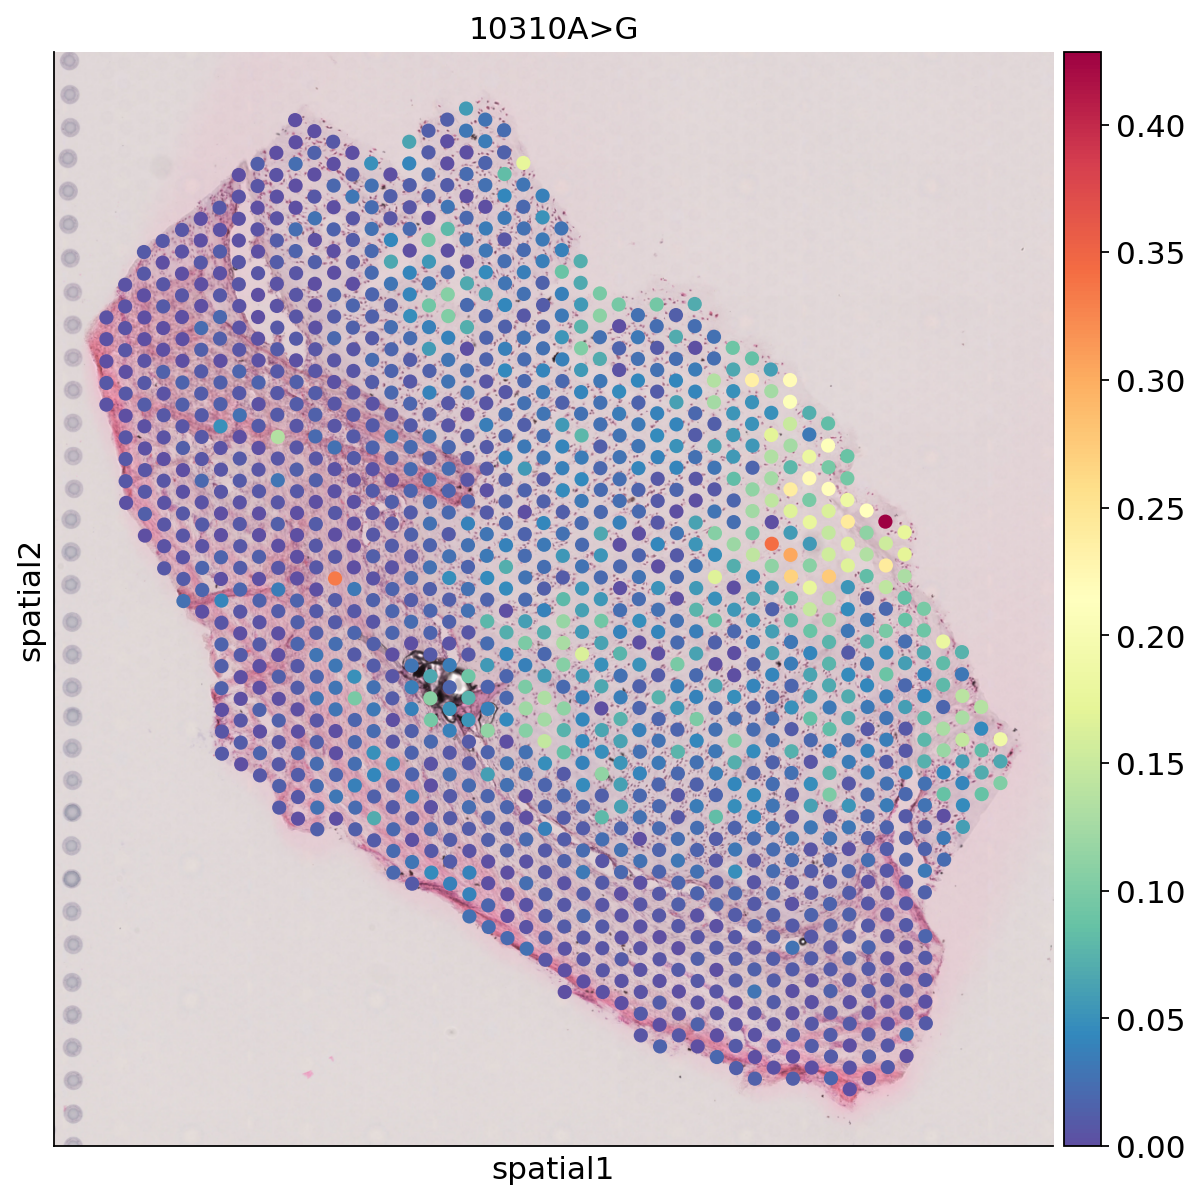

In [107]:
 tar_l = ['10310A>G']
    
ncols = 1
nrows = 1
figsize = 9
wspace = 0.9
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols - 1), nrows * figsize),
)
# plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print("axes:", axs)
sc.pl.spatial(adata, img_key="hires", color=[tar_l[0]], na_in_legend=False, cmap="Spectral_r", ax=axs)
# sc.pl.spatial(adata, img_key="hires", color=[tar_l[0]], na_in_legend=False, cmap="Spectral_r", ax=axs[1], show=False)

# sc.pl.spatial(adata, img_key="hires", color=["clone"], ax=axs, show=False)
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
    


In [108]:
n_results = results.copy(deep=True)
n_results['qval'] = n_results['qval'] + 1e-20
n_results['pval'] = n_results['pval'] + 1e-20

/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/SpatialDE/plot.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for conf_class, result_group in results.groupby(conf_categories):
/autofs/bal31/jhsu/home/_env/anaconda3/envs/scanpy/lib/python3.12/site-packages/SpatialDE/plot.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()])


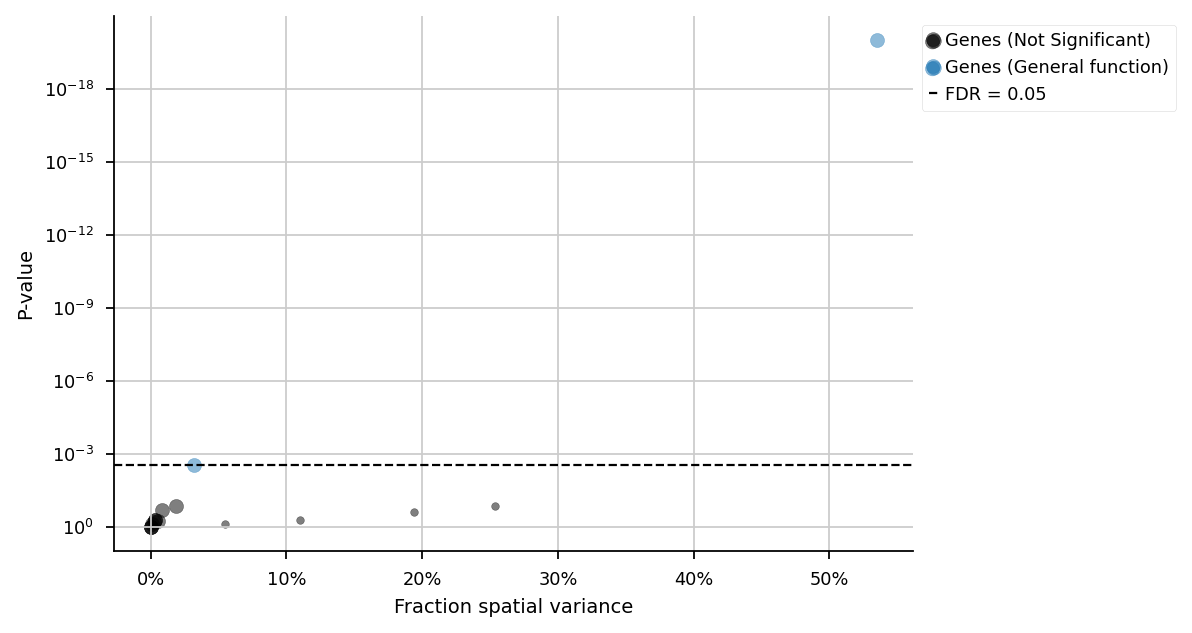

In [117]:
import SpatialDE.plot
SpatialDE.plot.FSV_sig(n_results)

/tmp/ipykernel_249924/1449913276.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for conf_class, result_group in results.groupby(conf_categories):


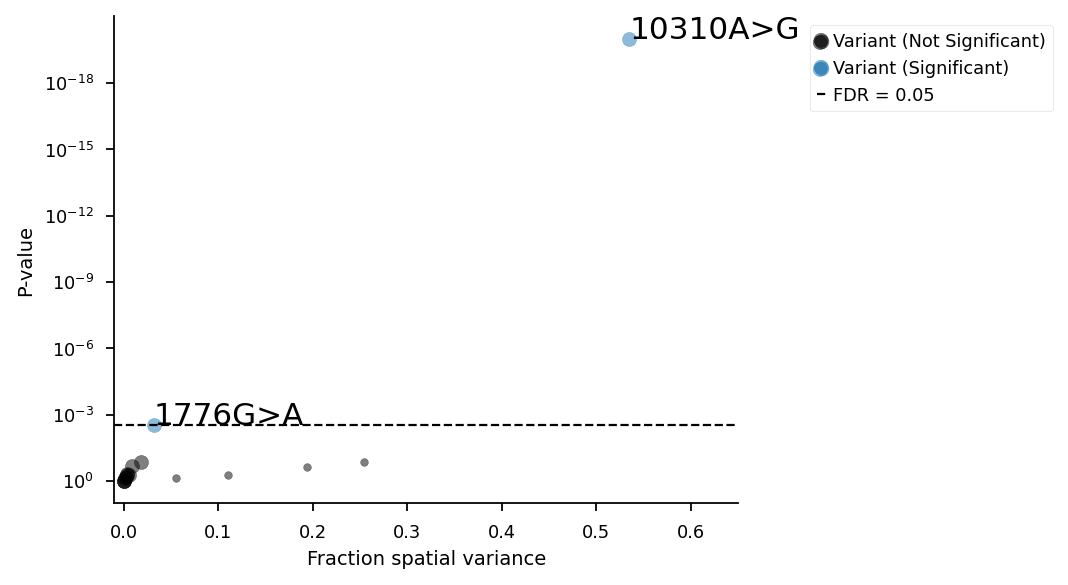

In [118]:
def FSV_sig(results, ms_results=None, certain_only=False, covariate_names=['log_total_count']):
    ''' Make a plot of Fraction Spatial Variance vs Q-value

    Optionally provide model selection results to the function will color points by model.

    Point size correspond to certinety of the FSV value.
    '''
    plt.figure(figsize=(5,4))
    plt.yscale('log')
    
    results = results.copy()
    covariates = results.query('g in @covariate_names')
    results = results.query('g not in @covariate_names').copy()
    
    results['FSV95conf'] = 2 * np.sqrt(results['s2_FSV'])
    if ms_results is not None:
        results = results.merge(ms_results[['g', 'model']],
                                how='outer',
                                on='g',
                                suffixes=('', '_bic'))
    else:
        results['model_bic'] = results['model']
    
    # Split by FSV uncertainty levels
    size_map = {0.0: 40, 0.1: 12, 1.0: 1}
    conf_categories = pd.cut(results['FSV95conf'], [0, 1e-1, 1e0, np.inf])
    for conf_class, result_group in results.groupby(conf_categories):
        if certain_only:
            if conf_class.left > .0:
                continue
        
        # Plot non-signficant genes
        tmp = result_group.query('qval > 0.05')
        label = 'Variant (Not Significant)' if conf_class.left == 0.0 else None
        plt.scatter(tmp['FSV'], tmp['pval'],
                    alpha=0.5,
                    rasterized=True,
                    label=label,
                    marker='o',
                    color='k',
                    s=size_map[conf_class.left])

        tmp = result_group.query('qval <= 0.05')

        # Split significant genes by function class
        model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}
        label_map = {'SE': 'General', 'PER': 'Periodic', 'linear': 'Linear'}
        for model_name, model_group in tmp.groupby('model_bic'):
            label = 'Variant (Significant)' if conf_class.left == 0.0 else None
            plt.scatter(model_group['FSV'], model_group['pval'],
                        alpha=0.5,
                        rasterized=True,
                        label=label,
                        marker='o',
                        color=model_colors[model_name],
                        s=size_map[conf_class.left])

    # Plot external covarites for reference
    plt.scatter(covariates['FSV'], covariates['pval'], marker='x', c='k', s=50, label=None)
    
    FDR_lim = results.query('qval < 0.05')['pval'].max()
    plt.axhline(FDR_lim, ls='--', c='k', lw=1, label='FDR = 0.05')
    tar_g = '10310A>G'
    plt.annotate(tar_g, (list(n_results[n_results['g']==tar_g][['FSV', __y]].values[0])))
    
    tar_g = '1776G>A'
    plt.annotate(tar_g, (list(n_results[n_results['g']==tar_g][['FSV', __y]].values[0])))
    
    plt.xlim(-0.01, 0.65)
    
    # Label axes
    

    plt.xlabel('Fraction spatial variance')
    plt.ylabel('P-value')
    plt.gca().invert_yaxis()
    plt.grid(None)
    lgd = plt.legend(scatterpoints=3, loc='upper left', bbox_to_anchor=[1.1, 1.])
    
#     xpercent_scale()
    
FSV_sig(n_results)